<a href="https://colab.research.google.com/github/fOrest1337/PET-PROJECTS/blob/main/%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BB%D0%B8%D0%BD%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B8_%D1%81%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Задача проекта заключается в прогнозировании цен на недвижимость с помощью линейной регрессии
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
data=pd.read_csv('/content/gdrive/MyDrive/train.csv') #подгрузили датасет с данными для обучения модели


Mounted at /content/gdrive


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.describe() # статистики по столбцам

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data['SalePrice'].describe()#отдельно выведены статистики для цены домов

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


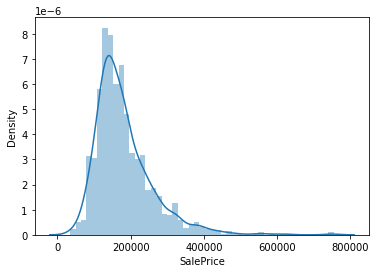

In [ ]:
sns.distplot(data['SalePrice'],kde=True) #гистограмма для цены недвижимости

In [ ]:
from scipy import stats
NENORMAL=stats.shapiro(data['SalePrice'])#проведем тест шапиро на нормальность распределения цены на недвижимость


In [ ]:
NENORMAL#РАСПРЕДЕЛЕНИЕ ЦЕН НА ДОМА ИМЕЕТ НЕ НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ 

ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)

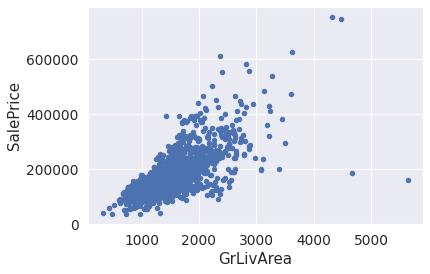

In [ ]:
data.plot.scatter(x='GrLivArea',y='SalePrice')

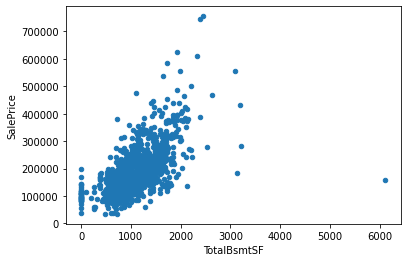

In [ ]:
data.plot.scatter(x='TotalBsmtSF',y='SalePrice')

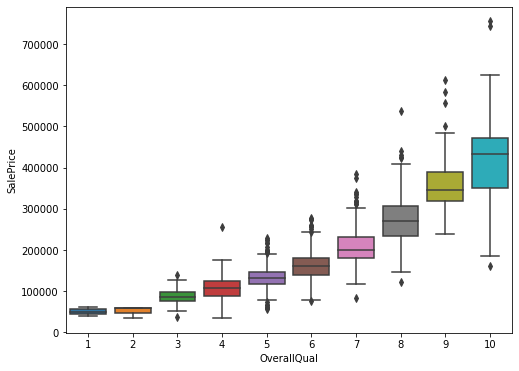

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='OverallQual',y='SalePrice',data=data)


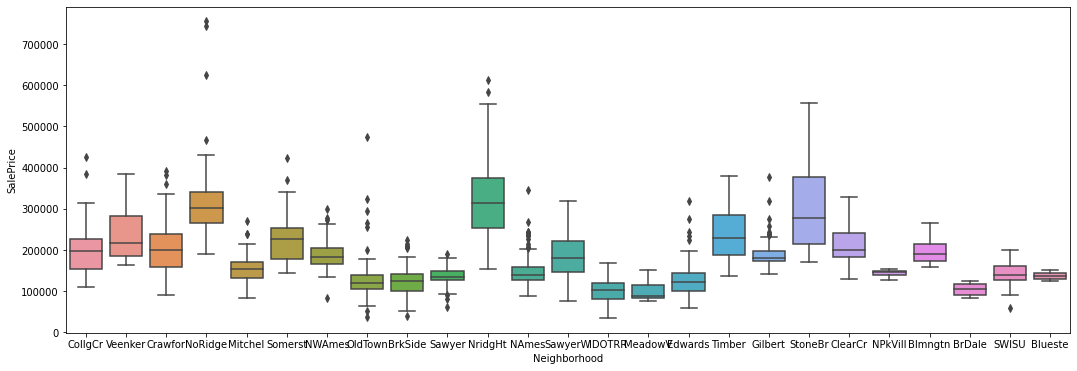

In [ ]:
f,ax=plt.subplots(figsize=(18,6))
fig=sns.boxplot(x='Neighborhood',y='SalePrice',data=data)

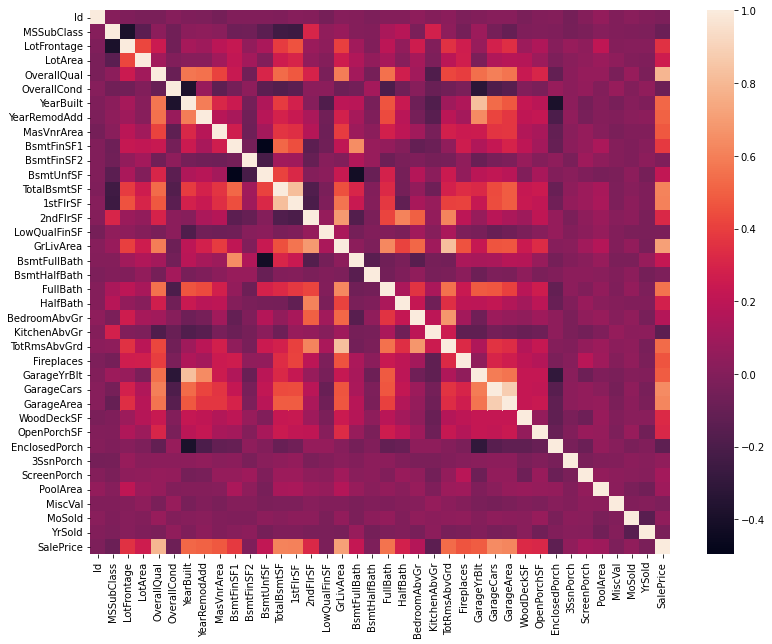

In [ ]:
matricakorelyacii=data.corr()# сконструируем матрицу корреляций и сделаем на ее основе хитмап
f,ax=plt.subplots(figsize=(13,10))
fig=sns.heatmap(matricakorelyacii)


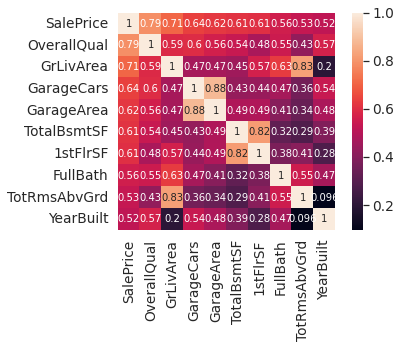

In [ ]:
k = 10 
cols = matricakorelyacii.nlargest(k, 'SalePrice').index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()#оставим только самые коррелируемые с ценой факторы

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


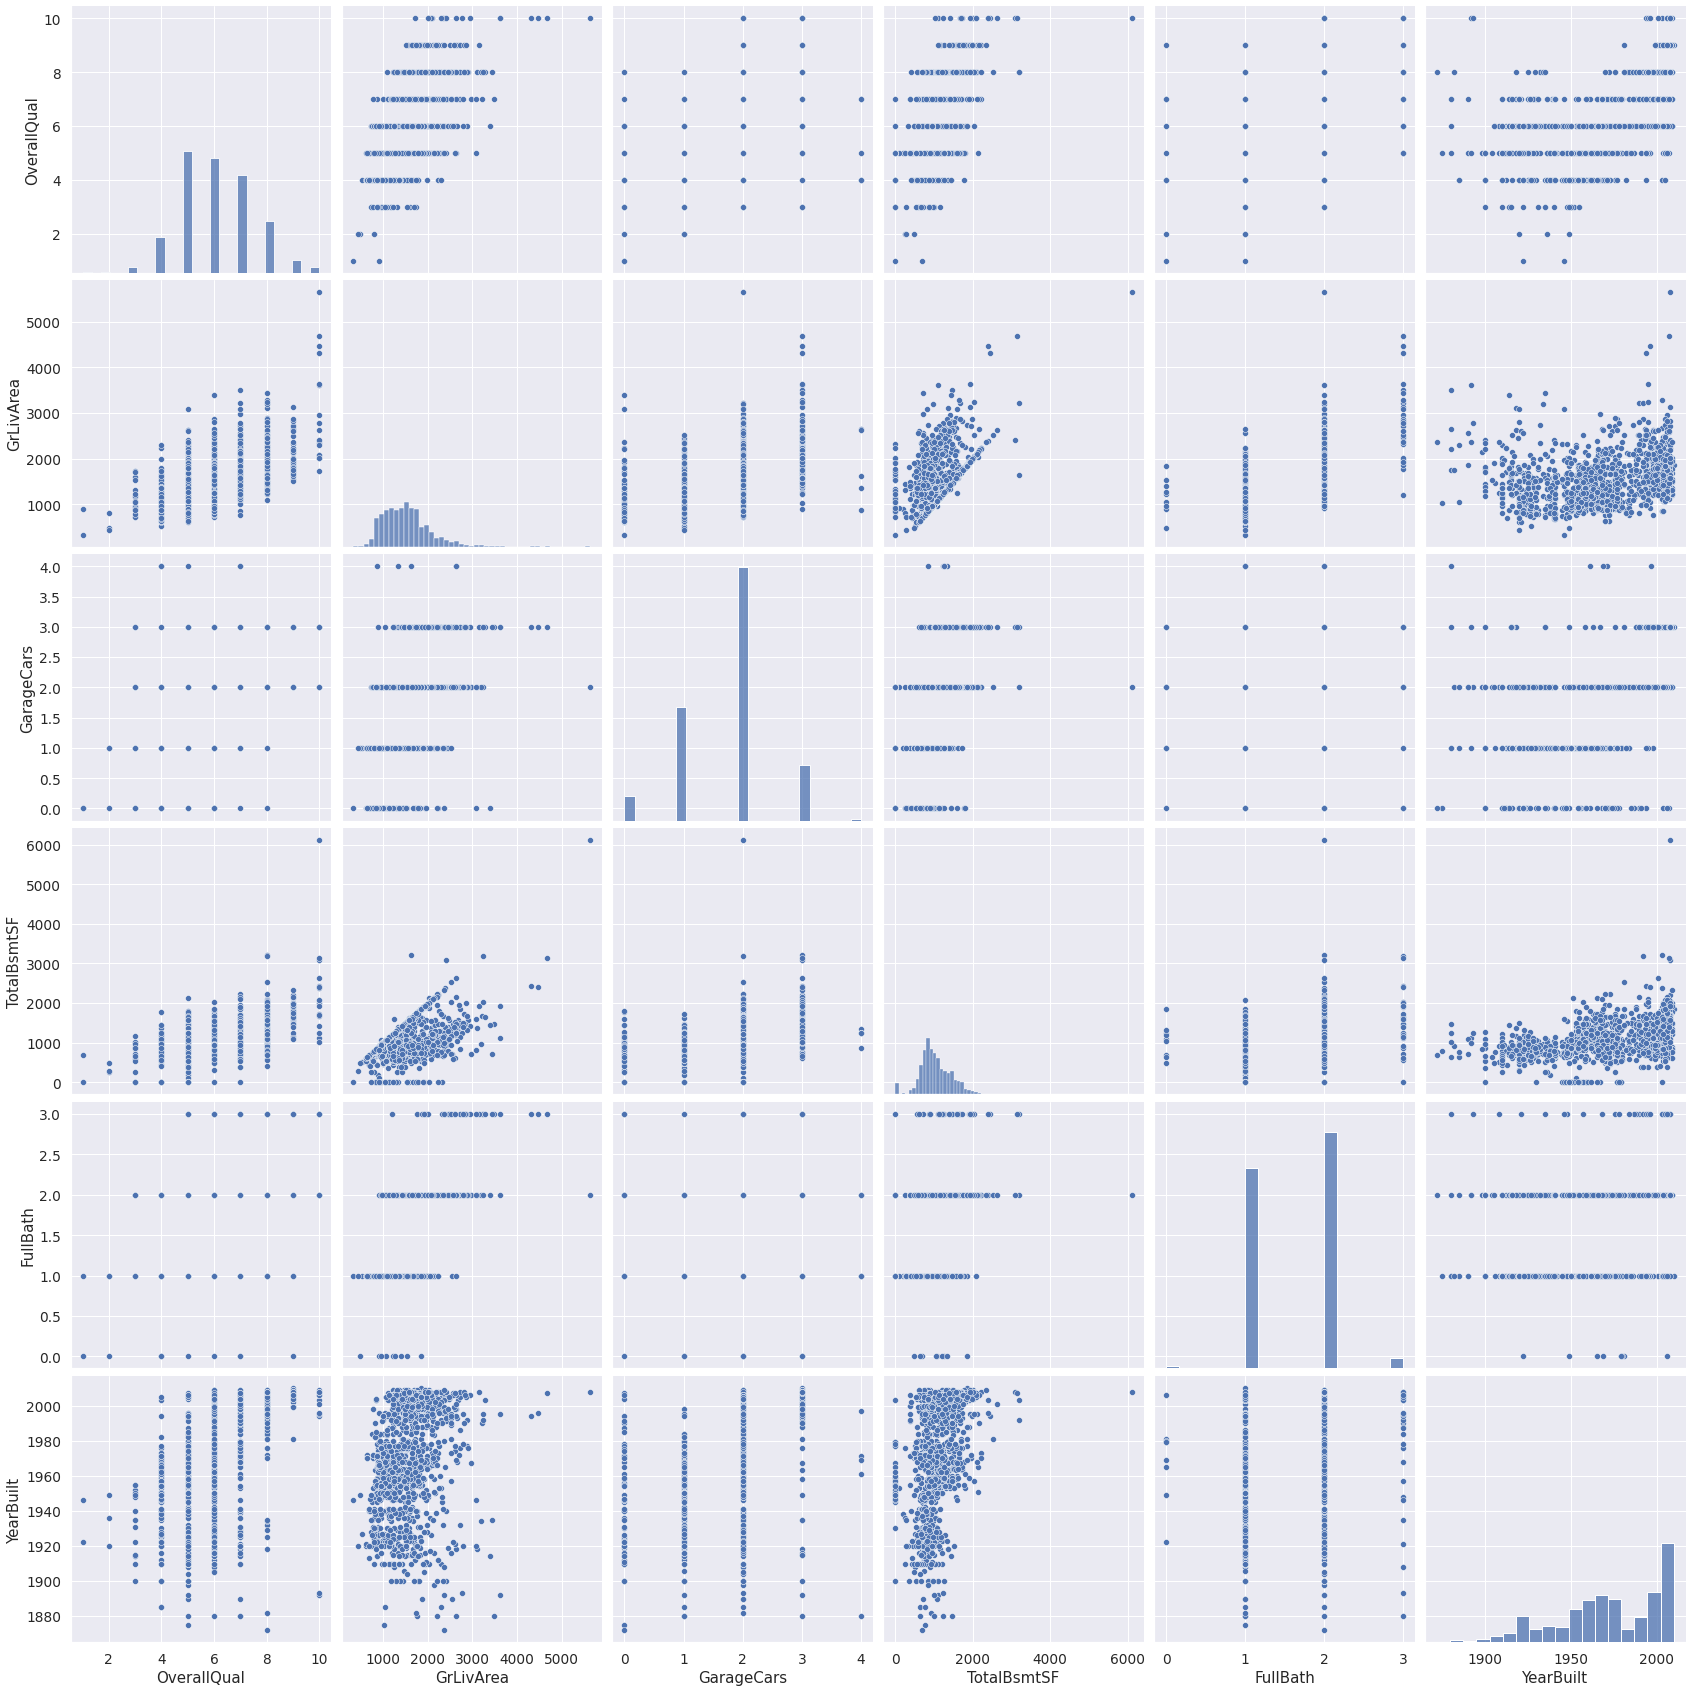

In [ ]:
cols =['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols],size=4)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn. linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import gls
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

In [ ]:
cols =data.loc[:,['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']]
print(cols)#подготовили массив с features

      OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt
0               7       1710           2          856         2       2003
1               6       1262           2         1262         2       1976
2               7       1786           2          920         2       2001
3               7       1717           3          756         1       1915
4               8       2198           3         1145         2       2000
...           ...        ...         ...          ...       ...        ...
1455            6       1647           2          953         2       1999
1456            6       2073           2         1542         2       1978
1457            7       2340           1         1152         2       1941
1458            5       1078           1         1078         1       1950
1459            5       1256           1         1256         1       1965

[1460 rows x 6 columns]


In [ ]:
cols.dropna(inplace=True)
y=data['SalePrice']# saleprice-регрессант
X=cols
X = sm.add_constant(X)#добавим в модель константу

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary()) # получим модель, однако можно ее доработать,прологарифмировав цену ,так как она сильно превосходит по модулю наши features

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     804.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:45:41   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.377e+05   9.05e+04     -8.154      

In [ ]:
bp = het_breuschpagan(results.resid, results.model.exog)#согласно тесту бреуша-пагана модель гетероскедастична
IMENA=['LM STAT','LM P-VALUE','F-STAT','F-STAT P-VALUE']
print(dict(zip(IMENA,bp)))


{'LM STAT': 393.9194538517822, 'LM P-VALUE': 5.670380698055044e-82, 'F-STAT': 89.48119484883385, 'F-STAT P-VALUE': 1.1903413148882923e-95}


In [ ]:
cols.dropna(inplace=True)

In [ ]:
y=np.log(data['SalePrice'])#рассчитаем модель(в этот раз возьмем логарифм от регрессанта ,чтобы сгладить разброс по модулю между регрессантом и регрессорами ,а также добавим поправки Уайта на гетероскедастичность)
X=cols
X = sm.add_constant(X)
model = sm.OLS(y, X,cov_type='HC1_se')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1046.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:48:43   Log-Likelihood:                 488.47
No. Observations:                1460   AIC:                            -962.9
Df Residuals:                    1453   BIC:                            -925.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0057      0.410     14.643      

In [ ]:
data1=pd.read_csv('/content/gdrive/MyDrive/test.csv')
data1.head()#выборку мы обучали на датасете train,на сете test будем уже прогнозировать


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
data1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
X1=cols#предсказанные значения
X1 = sm.add_constant(X1)
ITOG=results.predict(X1)
print(ITOG)

0       12.233363
1       12.005537
2       12.254965
3       12.106392
4       12.571828
          ...    
1455    12.117155
1456    12.242883
1457    12.186402
1458    11.691922
1459    11.793352
Length: 1460, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
